In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [21]:
df_income = pd.read_csv("https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/Icecream.csv")
df_income

,rownames,cons,income,price,temp
0,1,0.386,78,0.270,41
1,2,0.374,79,0.282,56
2,3,0.393,81,0.277,63
3,4,0.425,80,0.280,68
4,5,0.406,76,0.272,69
5,6,0.344,78,0.262,65
6,7,0.327,82,0.275,61
7,8,0.288,79,0.267,47
8,9,0.269,76,0.265,32
9,10,0.256,79,0.277,24


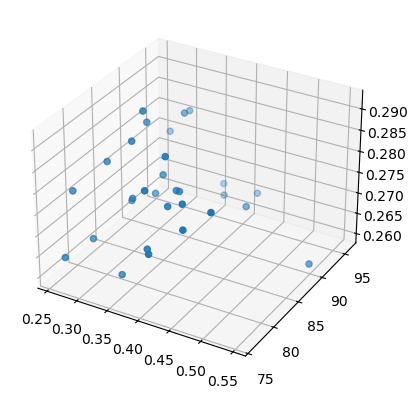

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter (xs = 'cons', ys = 'income',zs = 'price', data = df_income)
plt.show()

In [40]:
#Подгоним плоскость 
fitted_plane = smf.ols(formula= 'income ~ cons + np.sin(price)', data=df_income).fit()

In [41]:
fitted_plane.params

Intercept        105.476940
cons               2.031537
np.sin(price)    -79.488722
dtype: float64

In [42]:
beta0, beta1, beta2 = fitted_plane.params

In [43]:
X= np.arange(start = df_income ['cons'].min(), stop = df_income['cons'].max(), step=1)
Y= np.arange(start = df_income ['price'].min(), stop = df_income ['price'].max(), step=1)
X,Y = np.meshgrid(X,Y)

In [44]:
Z = beta0 + beta1 * X+ beta2 * Y

<function matplotlib.pyplot.show(close=None, block=None)>

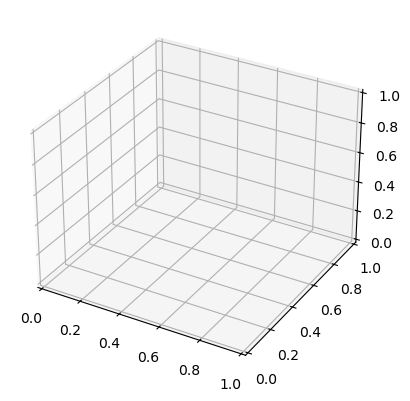

In [45]:
fig.ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(X,Y,Z, color = 'r', alpha = 0.2)
ax.scatter (zs = 'price', xs = 'cons', ys = 'income', data = df_income)
plt.show